<a href="https://colab.research.google.com/github/sharvani1357/DecisionTree/blob/main/decisiontrees2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('bank_marketing_dataset.csv')

In [ ]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

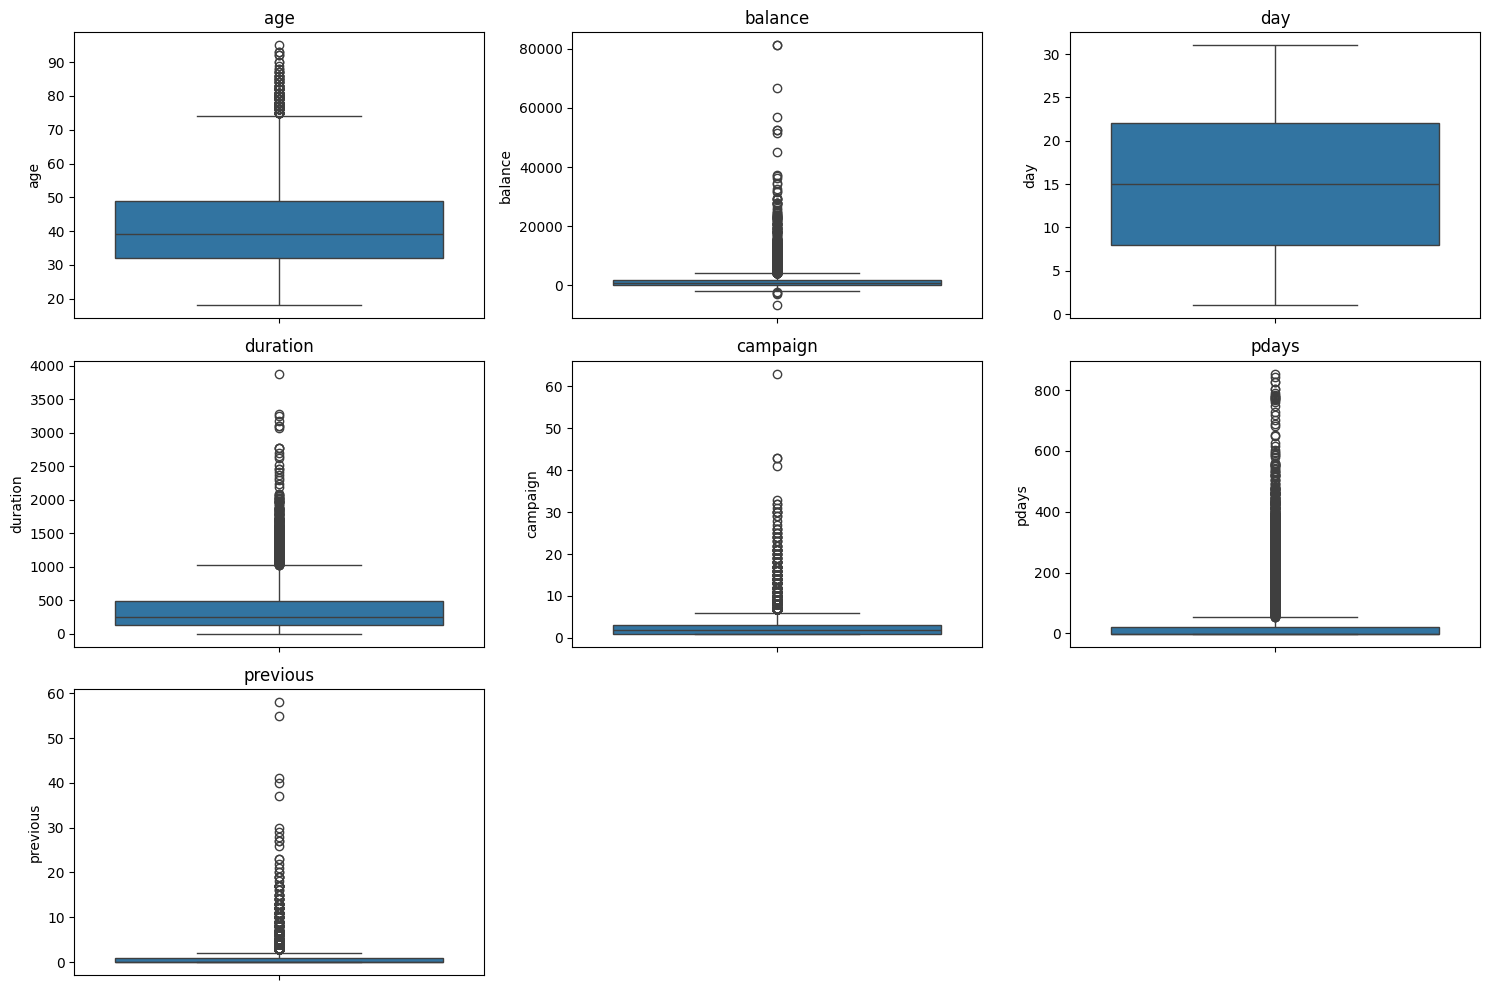

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
df_handled = df.copy()

for col in num_cols:
    Q1 = df_handled[col].quantile(0.25)
    Q3 = df_handled[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_handled[col] = df_handled[col].clip(lower, upper)






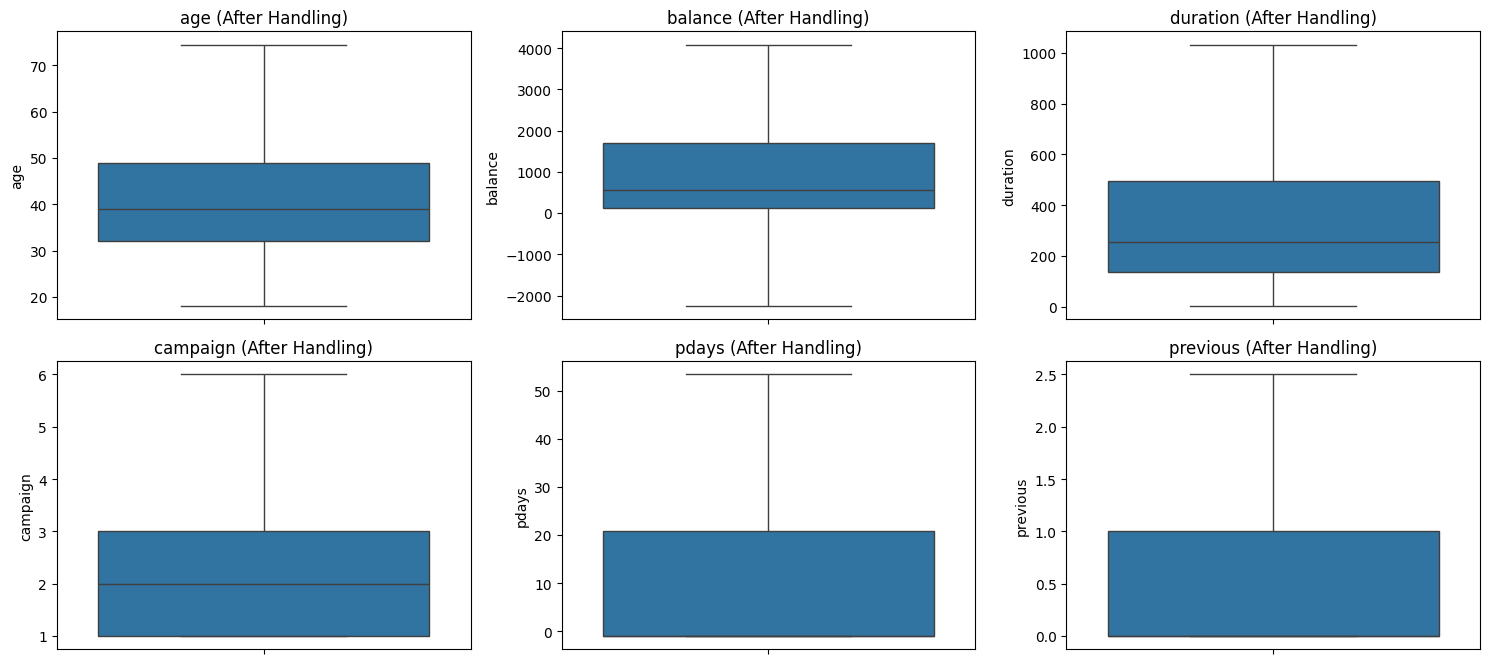

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_handled[col])
    plt.title(f"{col} (After Handling)")

plt.tight_layout()
plt.show()


In [ ]:
X = df_handled.drop('deposit', axis=1)
deposit = df_handled['deposit']



In [ ]:
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])

deposit = le.fit_transform(deposit)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59.0,0,1,1,0,2343,1,0,2,5,8,1033,1,-1.0,0.0,3
1,56.0,0,1,1,0,45,0,0,2,5,8,1033,1,-1.0,0.0,3
2,41.0,9,1,1,0,1270,1,0,2,5,8,1033,1,-1.0,0.0,3
3,55.0,7,1,1,0,2476,1,0,2,5,8,579,1,-1.0,0.0,3
4,54.0,0,1,2,0,184,0,0,2,5,8,673,2,-1.0,0.0,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, deposit_train, deposit_test = train_test_split(X, deposit, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

model.fit(X_train, deposit_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
deposit_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(deposit_test, deposit_pred))
print("\nConfusion Matrix:\n", confusion_matrix(deposit_test, deposit_pred))
print("\nClassification Report:\n", classification_report(deposit_test, deposit_pred))


Accuracy: 0.8069861173309449

Confusion Matrix:
 [[866 300]
 [131 936]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1166
           1       0.76      0.88      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.82      0.81      0.81      2233



confusion matrix [[866 300]
 [131 936]]


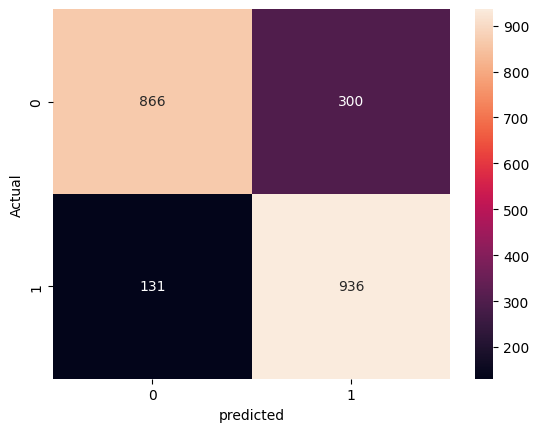

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(deposit_test,deposit_pred)
print("confusion matrix",cm)
sns.heatmap(cm,annot=True,fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

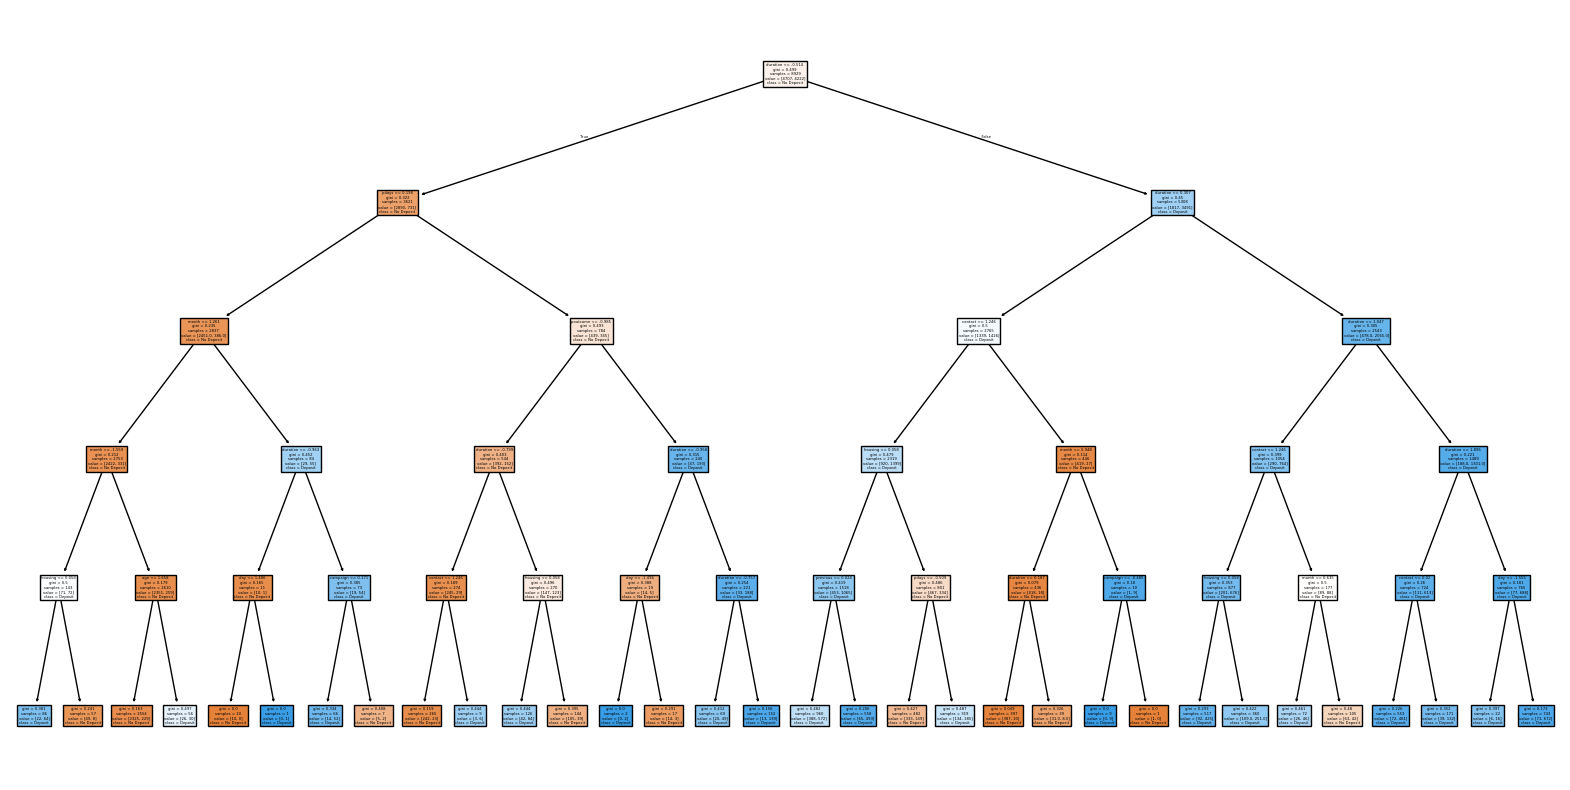

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No Deposit", "Deposit"],
    filled=True
)
plt.show()


In [ ]:
from sklearn.tree import export_text

rules = export_text(model, feature_names=list(X.columns))
print(rules)


|--- duration <= -0.51
|   |--- pdays <= 0.20
|   |   |--- month <= 1.26
|   |   |   |--- month <= -1.56
|   |   |   |   |--- housing <= 0.06
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- housing >  0.06
|   |   |   |   |   |--- class: 0
|   |   |   |--- month >  -1.56
|   |   |   |   |--- age <= 1.66
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  1.66
|   |   |   |   |   |--- class: 1
|   |   |--- month >  1.26
|   |   |   |--- duration <= -0.96
|   |   |   |   |--- day <= 1.41
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- day >  1.41
|   |   |   |   |   |--- class: 1
|   |   |   |--- duration >  -0.96
|   |   |   |   |--- campaign <= 0.17
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- campaign >  0.17
|   |   |   |   |   |--- class: 0
|   |--- pdays >  0.20
|   |   |--- poutcome <= -0.99
|   |   |   |--- duration <= -0.80
|   |   |   |   |--- contact <= 1.25
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- contact >  1.25
|   |   |   |  

In [ ]:
top_feature = X.columns[model.tree_.feature[0]]
top_feature


'duration'

In [ ]:
import pandas as pd

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df


,Feature,Importance
11,duration,0.596462
8,contact,0.122999
13,pdays,0.069490
6,housing,0.067493
10,month,0.054042
15,poutcome,0.044983
14,previous,0.028648
0,age,0.010695
9,day,0.002740
12,campaign,0.002448


In [ ]:
deep_model = DecisionTreeClassifier(random_state=42)
deep_model.fit(X_train, deposit_train)
print("Train Accuracy:", deep_model.score(X_train, deposit_train))
print("Test Accuracy:", deep_model.score(X_test, deposit_test))


Train Accuracy: 1.0
Test Accuracy: 0.7747424988804299


In [ ]:
for depth in [2, 4, 6, 10]:
    temp_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    temp_model.fit(X_train, deposit_train)

    print(f"Depth: {depth}")
    print(" Train Accuracy:", temp_model.score(X_train, deposit_train))
    print(" Test Accuracy :", temp_model.score(X_test, deposit_test))
    print("-"*30)


Depth: 2
 Train Accuracy: 0.7146376973905253
 Test Accuracy : 0.6950291088222122
------------------------------
Depth: 4
 Train Accuracy: 0.7958337999776011
 Test Accuracy : 0.7890729959695477
------------------------------
Depth: 6
 Train Accuracy: 0.8254003807817225
 Test Accuracy : 0.8047469771607703
------------------------------
Depth: 10
 Train Accuracy: 0.8912532198454474
 Test Accuracy : 0.80653828929691
------------------------------


In [ ]:
print("Final Model Test Accuracy:", model.score(X_test, deposit_test))
print("Tree Depth:", model.get_depth())
print("Number of Leaves:", model.get_n_leaves())


Final Model Test Accuracy: 0.8069861173309449
Tree Depth: 5
Number of Leaves: 32
